In [6]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt



compute hinge loss

In [7]:
def loss(y, x, w):
    losses = (1 - y * np.dot(x, w))
    hinge_loss = 0
    for one_loss in losses:
        hinge_loss += max(0, one_loss)
    return hinge_loss / len(x)

read data and reshape data, split data into train data and valid data

In [8]:
data = load_svmlight_file('H:/ML/experiment/australian_scale.txt')
ones = np.ones(data[0].shape[0])
d = data[0].todense()
all_data = np.reshape(d.data, (data[0].shape[0], data[0].shape[1]))
all_data = np.column_stack((all_data, ones))
all_label = np.reshape(data[1].data, (data[1].shape[0], 1))
x_train, x_valid, y_train, y_valid = train_test_split(all_data, all_label, test_size=0.1)

initialize params

In [9]:
max_epoch = 500
eta = 0.01
C = 0.8
w = np.random.random((all_data.shape[1], 1))
train_loss = []
valid_loss = []

compute hinge loss and gradient, and then update gradient by gradient descent, finally compute train loss and valie loss

In [10]:
for i in range(0, max_epoch):
    hinge_loss = loss(y_train, x_train, w)
    if hinge_loss <= 0:
        w = w - eta * w
    else:
        gradient = (y_train * x_train).sum(axis=0) / len(x_train)
        gradient = np.reshape(gradient, (len(gradient), 1))
        w = w - eta * (w - gradient)
    train_loss.append(loss(y_train, x_train, w))
    valid_loss.append(loss(y_valid, x_valid, w))

plot the curve of train loss and valid loss

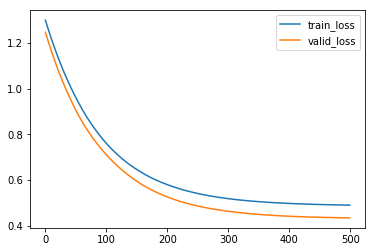

In [11]:
plt.plot(train_loss, label='train_loss')
plt.plot(valid_loss, label='valid_loss')
plt.legend()
plt.show()